In [2]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

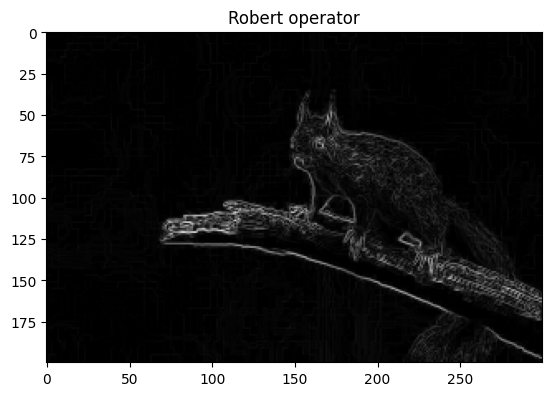

In [7]:
# Toán tử roberts

IMG_PATH='../../images/chuong_5/robert.webp'

roberts_cross_v = np.array([[1, 0 ],[0,-1 ]] )
roberts_cross_h = np.array( [[ 0, 1 ],[ -1, 0 ]] )

img = cv2.imread(IMG_PATH,0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255

abs_dst = cv2.convertScaleAbs(edged_img)
new_img=cv2.cvtColor(abs_dst, cv2.COLOR_BGR2RGB)
plt.title("Robert operator")
plt.imshow(new_img)
plt.show()

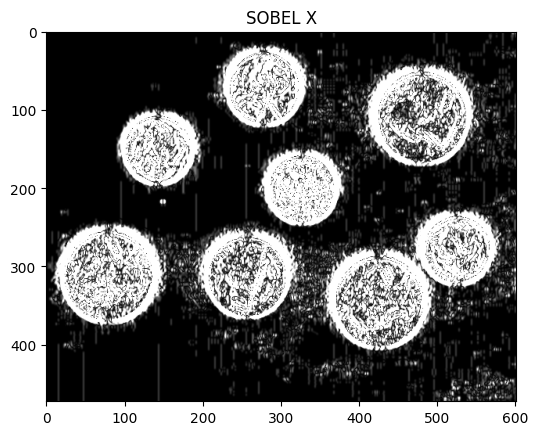

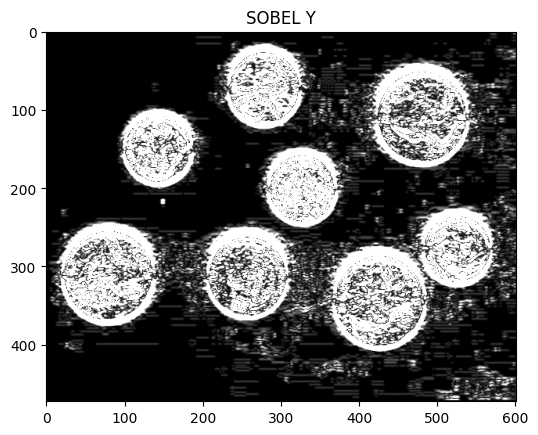

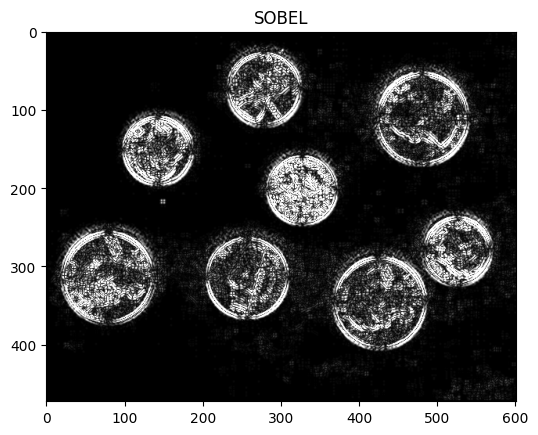

In [6]:
# Toán tử sobel

IMG_PATH='../../images/chuong_5/coin.webp'

img = cv2.imread(IMG_PATH)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

# Sobel Edge Detection on the X axis
def sobel_operation(x=0,y=0,title=''):
  sobel = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=x, dy=y, ksize=5)
  abs_dst = cv2.convertScaleAbs(sobel)
  new_img=cv2.cvtColor(abs_dst, cv2.COLOR_BGR2RGB)
  plt.title(title)
  plt.imshow(new_img)
  plt.show()

sobel_operation(1,0,"SOBEL X")
sobel_operation(0,1,"SOBEL Y")
sobel_operation(1,1,"SOBEL")

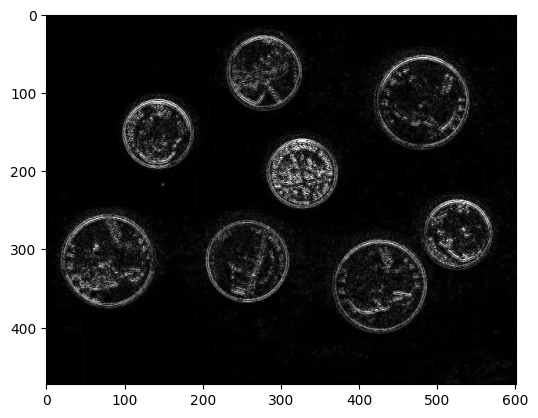

In [38]:
# Toán tử laplace
IMG_PATH='../../images/chuong_5/coin.webp'

def laplace_operator():
  # Declare the variables we are going to use
  ddepth = cv2.CV_16S
  kernel_size = 3

  src = cv2.imread(IMG_PATH, cv2.IMREAD_COLOR) # Load an image

  # Remove noise by blurring with a Gaussian filter
  src = cv2.GaussianBlur(src, (3, 3), 0)

  # Convert the image to grayscale
  src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  # Create Window
  # cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)
  # Apply Laplace function
  dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)
  # converting back to uint8
  abs_dst = cv2.convertScaleAbs(dst)
  new_img=cv2.cvtColor(abs_dst, cv2.COLOR_BGR2RGB)
  plt.imshow(new_img)
  plt.show()

laplace_operator()

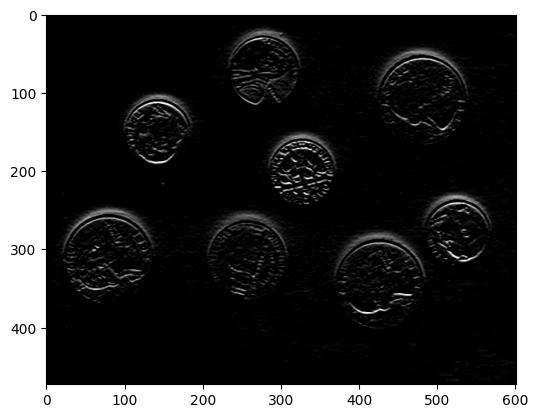

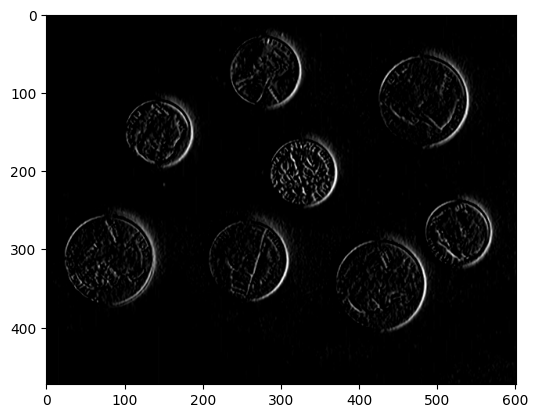

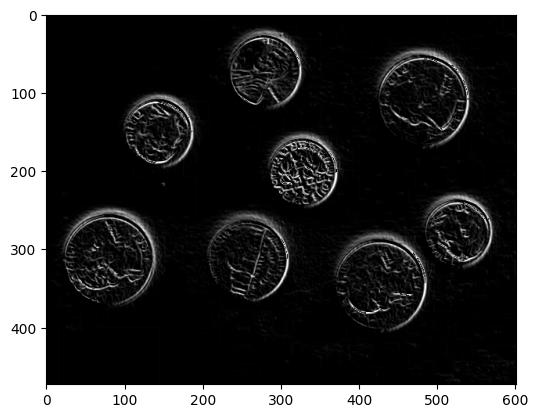

In [12]:
# Toán tử prewitt
IMG_PATH='../../images/chuong_5/coin.webp'

def show(img):
  new_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(new_img)
  plt.show()

def prewitt_operator():
  img = cv2.imread(IMG_PATH)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

  kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
  kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
  img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
  img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

  show(img_prewittx)
  show(img_prewitty)
  show(img_prewittx+img_prewitty)



prewitt_operator()

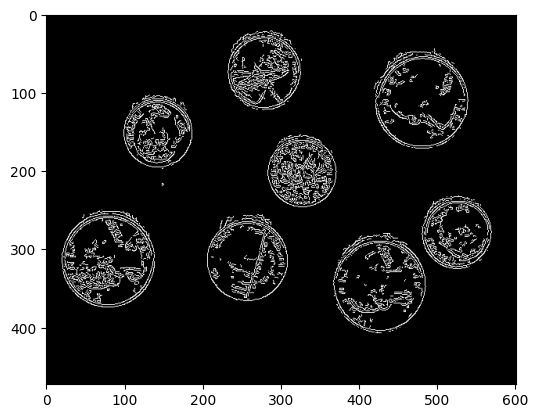

In [10]:
# Thuật toán canny
IMG_PATH='../../images/chuong_5/coin.webp'

def canny_operator():
  img = cv2.imread(IMG_PATH)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

  img_canny = cv2.Canny(img,100,200)
  new_img=cv2.cvtColor(img_canny, cv2.COLOR_BGR2RGB)
  plt.imshow(new_img)
  plt.show()

canny_operator()

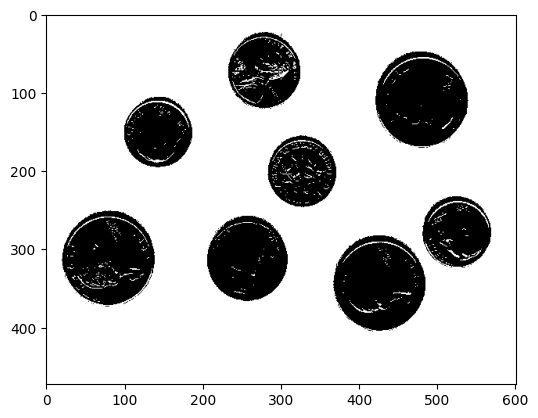

In [37]:
# Thuật toán otsu

IMG_PATH='../../images/chuong_5/coin.webp'

def otsu_algo():
  img = cv2.imread(IMG_PATH)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # thresholding
  ret, thres = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  new_img=cv2.cvtColor(thres, cv2.COLOR_BGR2RGB)

  plt.imshow(new_img)
  plt.show()

otsu_algo()